<a href="https://colab.research.google.com/github/jaylee07/Fluent_python/blob/master/%5BUdacity%5Dch4_Convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution()

In [0]:
dset, metadata = tfds.load(name='fashion_mnist', as_supervised=True, with_info=True)

In [4]:
dset.keys()

dict_keys(['test', 'train'])

In [0]:
trn_dset, tst_dset = dset['train'], dset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
n_trn_dset = metadata.splits['train'].num_examples
n_tst_dset = metadata.splits['test'].num_examples
print('n_trn_examples: {}'.format(n_trn_dset))
print('n_tst_examples: {}'.format(n_tst_dset))

n_trn_examples: 60000
n_tst_examples: 10000


## Image Preprocessing

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

trn_dset = trn_dset.map(normalize)
tst_dset = tst_dset.map(normalize)

### Explore the preprocessed images

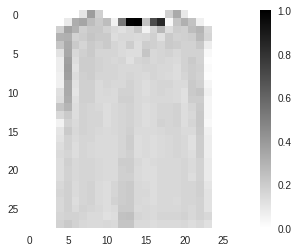

In [9]:
for image, label in trn_dset.take(1):
  break
image = image.numpy().reshape(28,28)

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

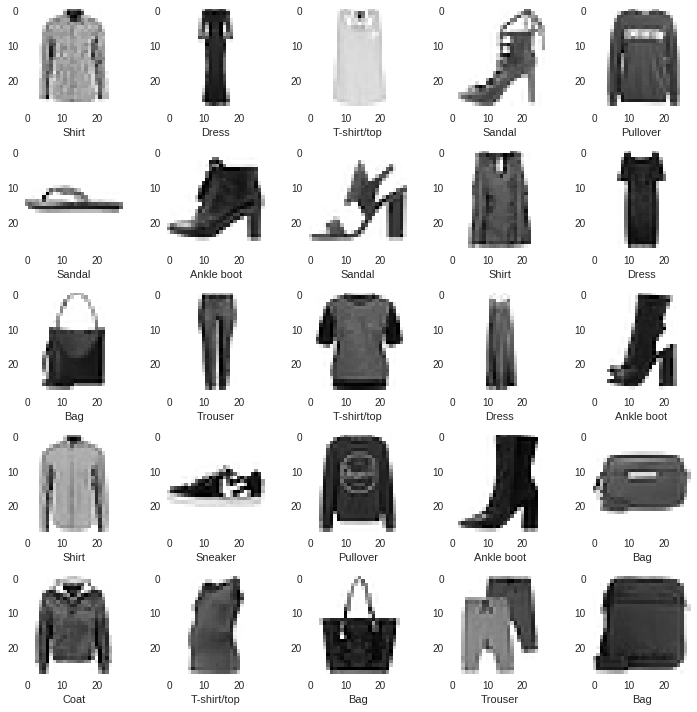

In [10]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
plt.tight_layout()
for i, (image, label) in enumerate(tst_dset.take(25)):
  row, col = int(i/5), i%5
  image = image.numpy().reshape((28,28))
  axes[row, col].imshow(image, cmap = plt.cm.binary)
  axes[row, col].grid(False)
  axes[row, col].set_xlabel(class_names[label])  

## Model construction

### Setup the layers

In [0]:
conv0 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                                activation=tf.nn.relu, input_shape=(28,28,1))
pool0 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
flat  = tf.keras.layers.Flatten()
dense0 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
dense1 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

model = tf.keras.Sequential([conv0, pool0, conv1, pool1, flat, dense0, dense1])

### Compile the model

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [0]:
batch_size = 32
trn_dset = trn_dset.repeat().shuffle(n_trn_dset).batch(batch_size)
tst_dset = tst_dset.batch(batch_size)

In [14]:
model.fit(trn_dset, epochs=10, steps_per_epoch = math.ceil(n_trn_dset/batch_size))

Epoch 1/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3897 - acc: 0.8581
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2576 - acc: 0.9070
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2155 - acc: 0.9210
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1789 - acc: 0.9336
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1553 - acc: 0.9427
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1316 - acc: 0.9523
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1124 - acc: 0.9583
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0914 - acc: 0.9658
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0775 - acc: 0.9721
Epoch 10/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0699 - acc: 0.9742


## Evaluate the accuracy

In [15]:
tst_loss, tst_acc = model.evaluate(tst_dset, steps = math.ceil(n_tst_dset/batch_size))
print('tst_acc: {}'.format(tst_acc))

313/313 [==============================] - 3s 11ms/step - loss: 0.3254 - acc: 0.9205
tst_acc: 0.9204999804496765


## Make pred and explore

In [0]:
for tst_image, tst_label in tst_dset.take(1):
  tst_image = tst_image.numpy()
  tst_label = tst_label.numpy()
  pred = model.predict(tst_image)

In [17]:
print(pred.shape)
print(pred[0])
print(tst_label[0])

(32, 10)


In [0]:
def plot_images(idx, pred_arrays, real_labels, images):
  pred_array, real_label, image = pred_arrays[idx], real_labels[idx], images[idx]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  image = image.reshape((28,28))
  plt.imshow(image, cmap = plt.cm.binary)
  pred_label = np.argmax(pred_array)
  if pred_label == real_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label], 
                                       100 * np.max(pred_array), 
                                       class_names[real_label]), color=color)
  
def plot_value_array(idx, pred_arrays, real_labels):
  pred_array, real_label = pred_arrays[idx], real_labels[idx]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  value_plot = plt.bar(range(10), pred_array, color = '#777777')
  plt.ylim([0,1])
  pred_label = np.argmax(pred_array)
  value_plot[pred_label].set_color('red')
  value_plot[real_label].set_color('blue')

In [0]:
idx = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(idx, pred, tst_label, tst_image)
plt.subplot(1,2,2)
plot_value_array(idx, pred, tst_label)

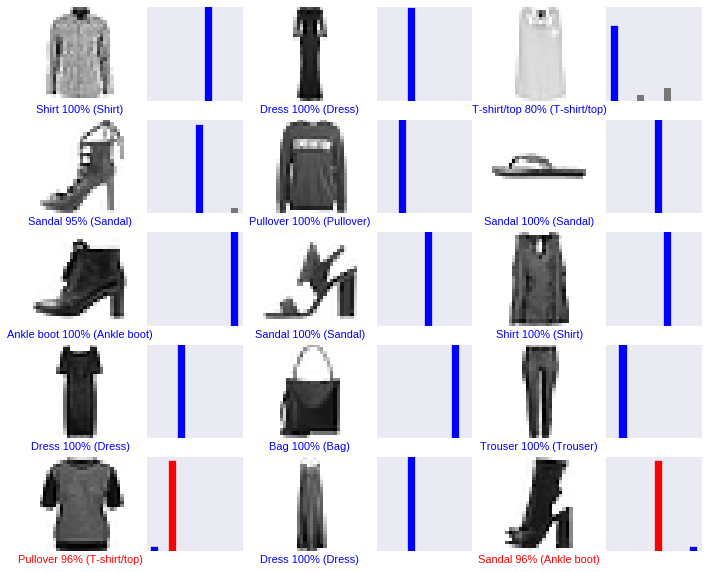

In [36]:
n_rows, n_cols = 5, 3
n_images = n_rows * n_cols
plt.figure(figsize = (2*2*n_cols, 2*n_rows))
for i in range(n_images):
  plt.subplot(n_rows, 2*n_cols, 2*i+1)
  plot_images(i, pred, tst_label, tst_image)
  plt.subplot(n_rows, 2*n_cols, 2*i+2)
  plot_value_array(i, pred, tst_label)

In [37]:
# Grab an image from the test dataset
print(tst_image[0].shape)
img = np.array([tst_image[0]])
print(img.shape)
pred_single = model.predict(img)
print(pred_single)
print(np.argmax(pred_single))

(28, 28, 1)
(1, 28, 28, 1)
[[6.3017029e-11 2.7616286e-12 3.5454084e-07 1.0221141e-07 3.3184077e-04
  2.7740226e-13 9.9966764e-01 8.6207820e-12 1.8254181e-13 9.0245519e-11]]
6


In [0]:
plot_value_array(0, pred, tst_label)
_ = plt.xticks(range(10), class_names, rotation=45)

# Exercises

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:
*   Set training epochs set to 1
*   Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
*   Add additional Dense layers between the Flatten and the final Dense(10,  activation=tf.nn.softmax), experiment with different units in these layers
*   Don't normalize the pixel values, and see the effect that has


Remember to enable GPU to make everything run faster (Runtime -> Change runtime type -> Hardware accelerator -> GPU).
Also, if you run into trouble, simply reset the entire environment and start from the beginning:
*   Edit -> Clear all outputs
*   Runtime -> Reset all runtimes

Problem 1
- Change the number of units in the 1st dense layer

In [0]:
batch_size = 128
n_epoch = 5
dense_units = [2**i for i in range(4, 10)]
for i, unit in enumerate(dense_units):
  trn_dset, tst_dset = dset['train'], dset['test']
  trn_dset, tst_dset = trn_dset.map(normalize), tst_dset.map(normalize)
  trn_dset = trn_dset.repeat().shuffle(n_trn_dset).batch(batch_size)
  tst_dset = tst_dset.batch(batch_size)
  print(">>>> The number of units in 1st layer: {}".format(unit))
  conv0 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                                 activation=tf.nn.relu, input_shape=(28,28,1))
  pool0 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
  conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                                 activation=tf.nn.relu)
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
  flat  = tf.keras.layers.Flatten()
  dense0 = tf.keras.layers.Dense(units = unit, activation = tf.nn.relu)
  dense1 = tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
  
  model = tf.keras.Sequential([conv0, pool0, conv1, pool1, 
                               flat, dense0, dense1])
  model.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])
  model.fit(trn_dset, epochs=n_epoch, 
            steps_per_epoch=math.ceil(n_trn_dset/batch_size))
  
  tst_loss, tst_acc = model.evaluate(tst_dset, 
                                     steps=math.ceil(n_tst_dset/batch_size))
  print("\n Acc in test set: {:.2f}%".format(100*tst_acc))
  del conv0, pool0, conv1, flat, dense0, dense1, model

Problem 2
- Add additional Dense layers between the Flatten and the final Dense(10, activation=tf.nn.softmax), experiment with different units in these layers

In [0]:
dense_units = [2**i for i in range(4, 9)]
for i, unit in enumerate(dense_units):
  trn_dset, tst_dset = dset['train'], dset['test']
  trn_dset, tst_dset = trn_dset.map(normalize), tst_dset.map(normalize)
  trn_dset = trn_dset.repeat().shuffle(n_trn_dset).batch(batch_size)
  tst_dset = tst_dset.batch(batch_size)
  print(">>>> The number of units in 1st layer: {}".format(unit))
  conv0 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                                 activation=tf.nn.relu, input_shape=(28,28,1))
  pool0 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
  conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                                 activation=tf.nn.relu)
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
  flat  = tf.keras.layers.Flatten()
  dense0 = tf.keras.layers.Dense(units = 128, activation=tf.nn.relu)
  dense1 = tf.keras.layers.Dense(units = unit, activation=tf.nn.relu)
  dense2 = tf.keras.layers.Dense(units = 10, activation=tf.nn.softmax)
  model = tf.keras.Sequential([conv0, pool0, conv1, pool1, 
                               flat, dense0, dense1, dense2])
  model.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])
  model.fit(trn_dset, epochs=n_epoch, 
            steps_per_epoch=math.ceil(n_trn_dset/batch_size))
  tst_loss, tst_acc = model.evaluate(tst_dset, 
                                     steps=math.ceil(n_tst_dset/batch_size))
  print("\n Acc in test set: {:.2f}%".format(100*tst_acc))
  del conv0, pool0, conv1, flat, dense0, dense1, model

Problem 3
- Do not normalize the pixel values

In [59]:
n_epoch=3
trn_dset, tst_dset = dset['train'], dset['test']
trn_dset = trn_dset.repeat().shuffle(n_trn_dset).batch(batch_size)
tst_dset = tst_dset.batch(batch_size)
print(">>>> The number of units in 1st layer: {}".format(unit))
conv0 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                               activation = tf.nn.relu, input_shape=(28,28,1))
pool0 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                               activation = tf.nn.relu)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
flat  = tf.keras.layers.Flatten()
dense0 = tf.keras.layers.Dense(units=128, activation = tf.nn.relu)
dense1 = tf.keras.layers.Dense(units=10, activation = tf.nn.softmax)
model0 = tf.keras.Sequential([conv0, pool0, conv1, pool1, flat, dense0, dense1])
model0.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])
model0.fit(trn_dset, epochs=n_epoch, 
           steps_per_epoch=math.ceil(n_trn_dset/batch_size))
tst_loss_wo_norm, tst_acc_wo_norm = model0.evaluate(tst_dset, 
                                                    steps = math.ceil(n_tst_dset/batch_size))

del conv0, pool0, conv1, pool1, flat, dense0, dense1

trn_dset, tst_dset = dset['train'], dset['test']
trn_dset, tst_dset = trn_dset.map(normalize), tst_dset.map(normalize)
trn_dset = trn_dset.repeat().shuffle(n_trn_dset).batch(batch_size)
tst_dset = tst_dset.batch(batch_size)
print(">>>> The number of units in 1st layer: {}".format(unit))
conv0 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                               activation = tf.nn.relu, input_shape=(28,28,1))
pool0 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                               activation = tf.nn.relu)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
flat  = tf.keras.layers.Flatten()
dense0 = tf.keras.layers.Dense(units=128, activation = tf.nn.relu)
dense1 = tf.keras.layers.Dense(units=10, activation = tf.nn.softmax)
model1 = tf.keras.Sequential([conv0, pool0, conv1, pool1, 
                              flat, dense0, dense1])
model1.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])
model1.fit(trn_dset, epochs=n_epoch, 
           steps_per_epoch=math.ceil(n_trn_dset/batch_size))
tst_loss, tst_acc = model1.evaluate(tst_dset, steps = 
                                    math.ceil(n_tst_dset/batch_size))
print('With normalize: {:.2f}%'.format(tst_acc*100))
print('Without normalize: {:.2f}%'.format(tst_acc_wo_norm*100))

>>>> The number of units in 1st layer: 256
Epoch 1/3
469/469 [==============================] - 29s 61ms/step - loss: 14.4976 - acc: 0.1003
Epoch 2/3
469/469 [==============================] - 15s 33ms/step - loss: 14.5074 - acc: 0.0999
Epoch 3/3
79/79 [==============================] - 4s 51ms/step - loss: 14.5130 - acc: 0.1000
>>>> The number of units in 1st layer: 256
Epoch 1/3
469/469 [==============================] - 34s 72ms/step - loss: 0.4877 - acc: 0.8241
Epoch 2/3
469/469 [==============================] - 19s 40ms/step - loss: 0.3114 - acc: 0.8896
Epoch 3/3
79/79 [==============================] - 4s 56ms/step - loss: 0.2846 - acc: 0.8964
With normalize: 89.64
Without normalize: 10.00
